ECG (Electrocardiogram): An ECG is a non-invasive medical test that records the electrical activity of the heart over time. It's commonly used to diagnose various heart conditions, including arrhythmias, myocardial infarction (heart attacks), and other cardiac abnormalities.

N,S,Q,V,F waves represents a classification system used in ECG interpretation to categorize different types of heartbeats or cardiac events.
<br>**N** stands for Normal Sinus Rhythm, indicating a regular and coordinated heartbeat originating from the sinus node.
<br>**S** represents Supraventricular Arrhythmias, which are abnormal heart rhythms.
<br>**Q** denotes Unknown or Unclassified heartbeats or patterns that cannot be confidently categorized.
<br>**V** indicates Ventricular Arrhythmias which are abnormal heart rhythms.
<br>**F** represents Fusion Beats, which exhibit characteristics of both normal and abnormal heart rhythms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
traindata = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)
testdata = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)

In [3]:
traindata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
traindata.shape

(21892, 188)

In [5]:
testdata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
testdata.shape

(87554, 188)

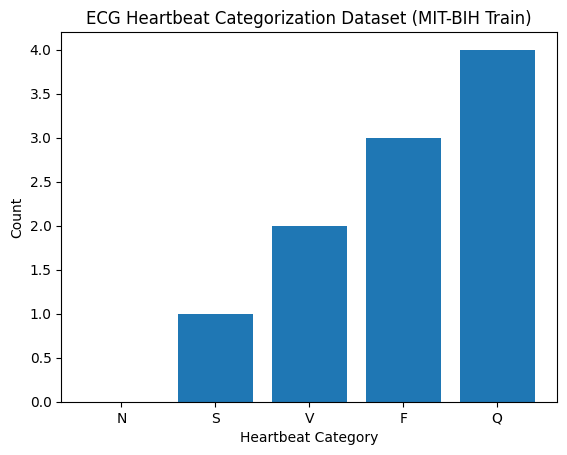

In [7]:
heartbeat_counts = np.array([0,1,2,3,4])

heartbeat_categories = ["N", "S","V","F","Q"]

plt.bar(heartbeat_categories, heartbeat_counts)
plt.xlabel("Heartbeat Category")
plt.ylabel("Count")
plt.title("ECG Heartbeat Categorization Dataset (MIT-BIH Train)")
plt.show()

In [8]:
testdata[187] = testdata[187].astype(int)

category = testdata[187].value_counts()

category_labels = {0: "N", 1: "S", 2: "V", 3: "F", 4: "Q"}

category_codes = category.index.to_list()

heartbeat_labels = []
for category_code in category_codes:
    heartbeat_labels.append(category_labels[category_code])

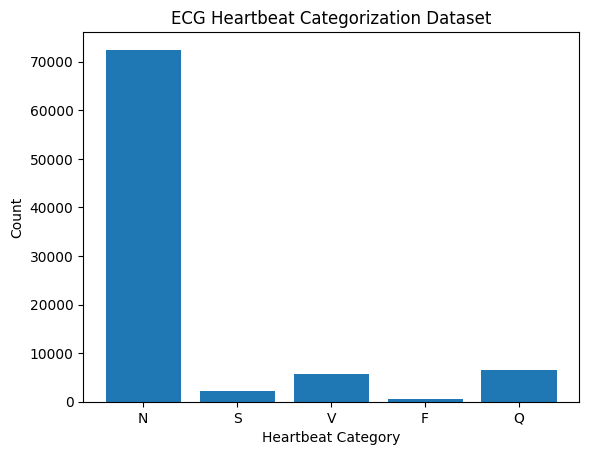

In [9]:
plt.bar(category_codes, category.values)
plt.xlabel("Heartbeat Category")
plt.ylabel("Count")
plt.title("ECG Heartbeat Categorization Dataset")
plt.xticks(category_codes, heartbeat_labels)
plt.show()

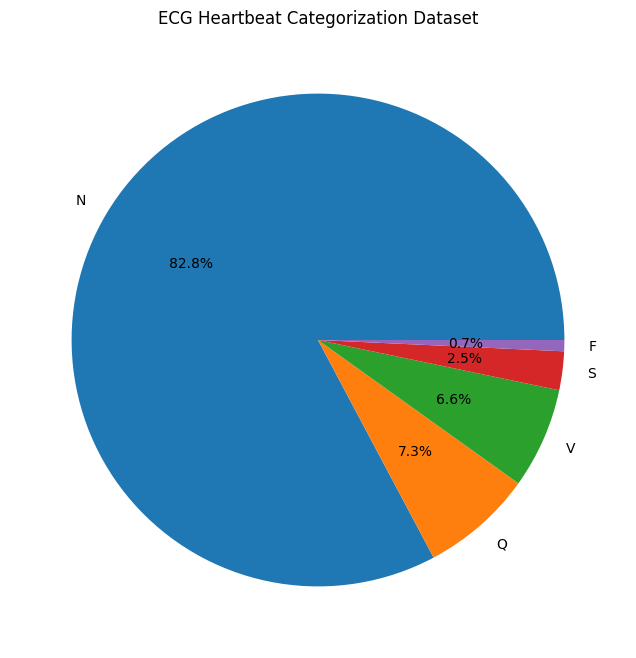

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(category, labels=heartbeat_labels, autopct='%1.1f%%')
plt.title("ECG Heartbeat Categorization Dataset")
plt.show()

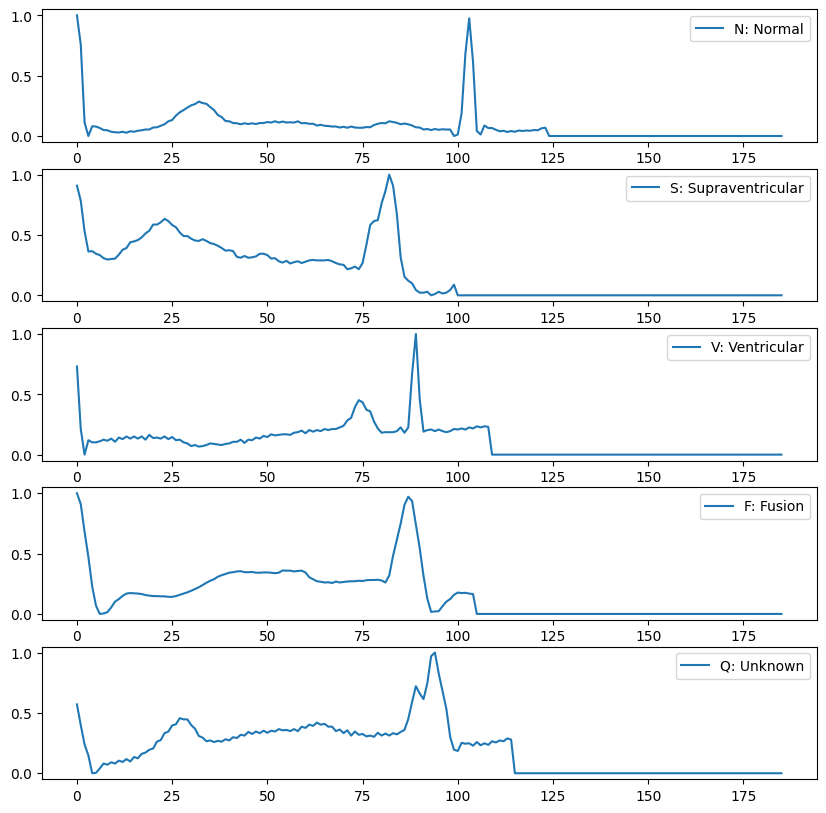

In [11]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10))

category_descriptions = {"N": "Normal", "S": "Supraventricular", "V": "Ventricular", "F": "Fusion", "Q": "Unknown"}

for i in range(5):
    axs[i].plot(traindata.iloc[i, :186], label=f"{heartbeat_categories[i]}: {category_descriptions[heartbeat_categories[i]]}")
    axs[i].legend()

plt.show()

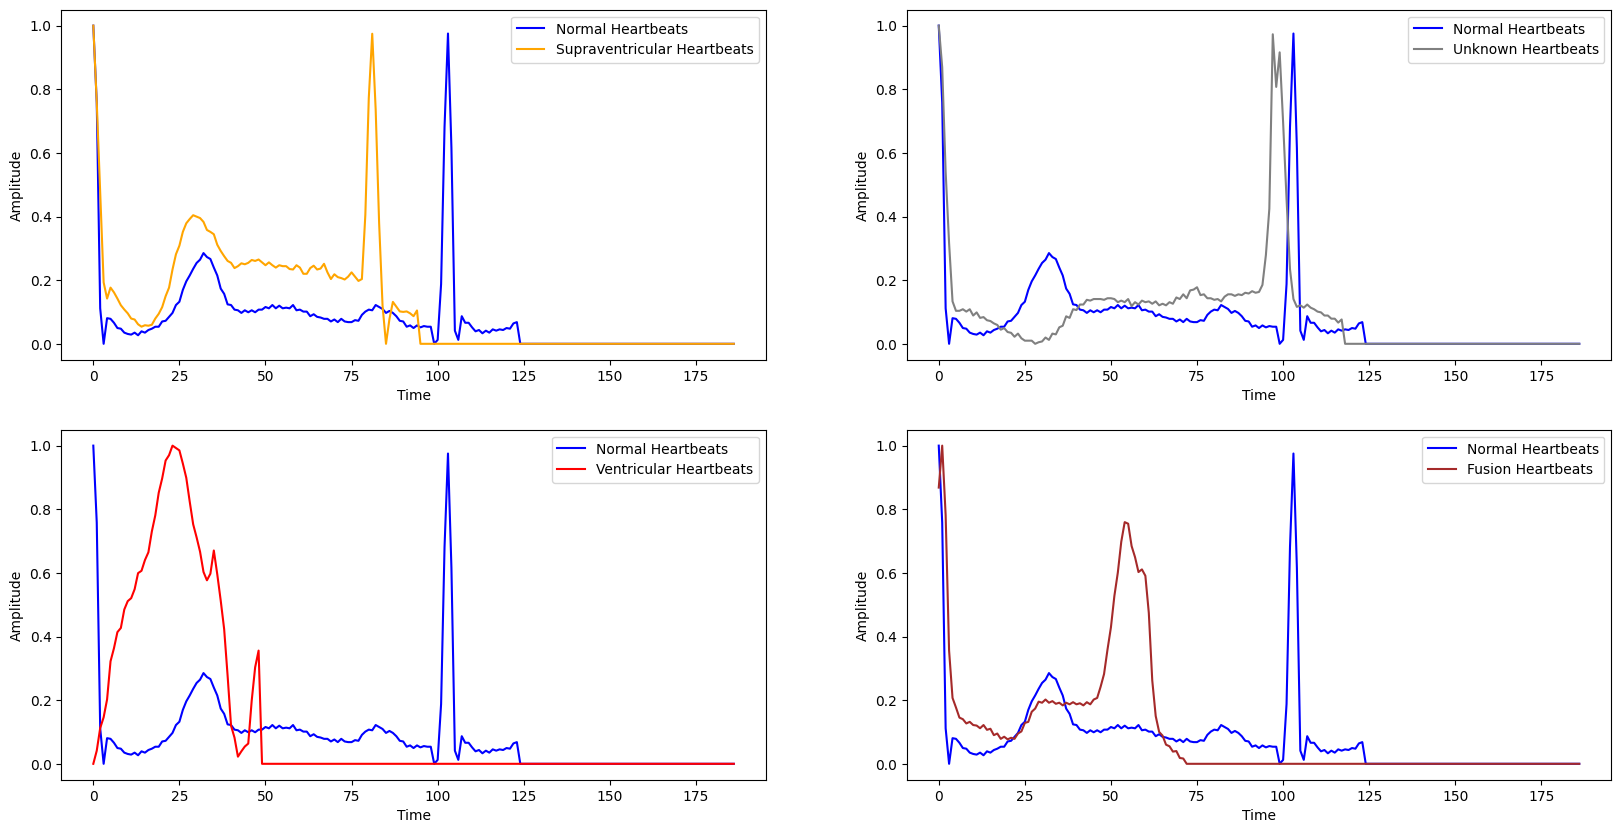

In [12]:
data_1 = traindata[traindata[187] == 1]
data_2 = traindata[traindata[187] == 2]
data_3 = traindata[traindata[187] == 3]
data_4 = traindata[traindata[187] == 4]

plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(traindata.iloc[0, :187], color='blue', label='Normal Heartbeats')
plt.plot(data_1.iloc[0, :187], color='orange', label='Supraventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(traindata.iloc[0, :187], color='blue', label='Normal Heartbeats')
plt.plot(data_4.iloc[0, :187], color='grey', label='Unknown Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(traindata.iloc[0, :187], color='blue', label='Normal Heartbeats')
plt.plot(data_2.iloc[0, :187], color='red', label='Ventricular Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(traindata.iloc[0, :187], color='blue', label='Normal Heartbeats')
plt.plot(data_3.iloc[0, :187], color='brown', label='Fusion Heartbeats')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.show()

**Normal ECG waves**, categorized as "N", depict the expected electrical activity of a healthy heart.

Conversely, **Abnormal ECG waves**, consist of "S", "V", "F", and "Q", signify various irregularities.

In [13]:
abnormaldata = pd.read_csv('/kaggle/input/heartbeat/ptbdb_abnormal.csv', header=None)
normaldata = pd.read_csv('/kaggle/input/heartbeat/ptbdb_normal.csv', header=None)

In [14]:
abnormaldata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
abnormaldata.shape

(10506, 188)

In [16]:
normaldata.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
normaldata.shape

(4046, 188)

/tmp/ipykernel_19/1689621212.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


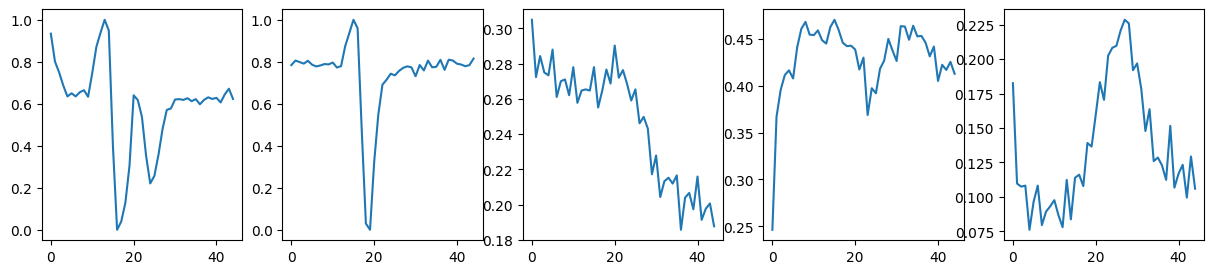

In [18]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Abormal Persons')
plt.subplot(1, 5, 1)
plt.plot(abnormaldata.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(abnormaldata.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(abnormaldata.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(abnormaldata.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(abnormaldata.values[44][5:50])

/tmp/ipykernel_19/4227639249.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, 1)


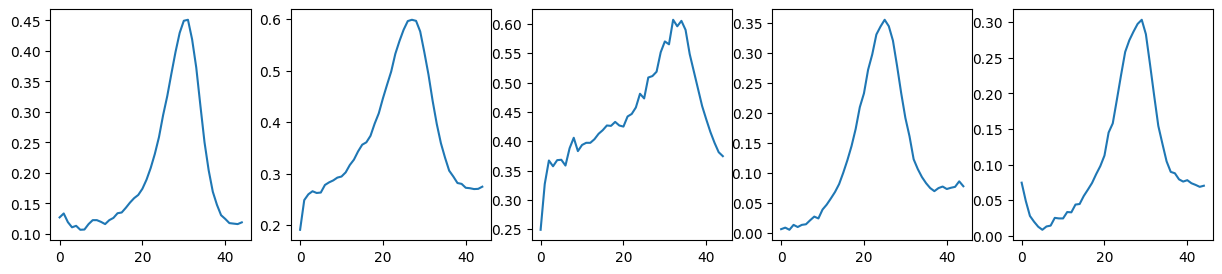

In [19]:
plt.figure(figsize=(15, 3))
plt.title('ECG Visualization of Normal Persons')
plt.subplot(1, 5, 1)
plt.plot(normaldata.values[0][5:50])
plt.subplot(1, 5, 2)
plt.plot(normaldata.values[10][5:50])
plt.subplot(1, 5, 3)
plt.plot(normaldata.values[20][5:50])
plt.subplot(1, 5, 4)
plt.plot(normaldata.values[40][5:50])
plt.subplot(1, 5, 5)
plt.plot(normaldata.values[77][5:50])

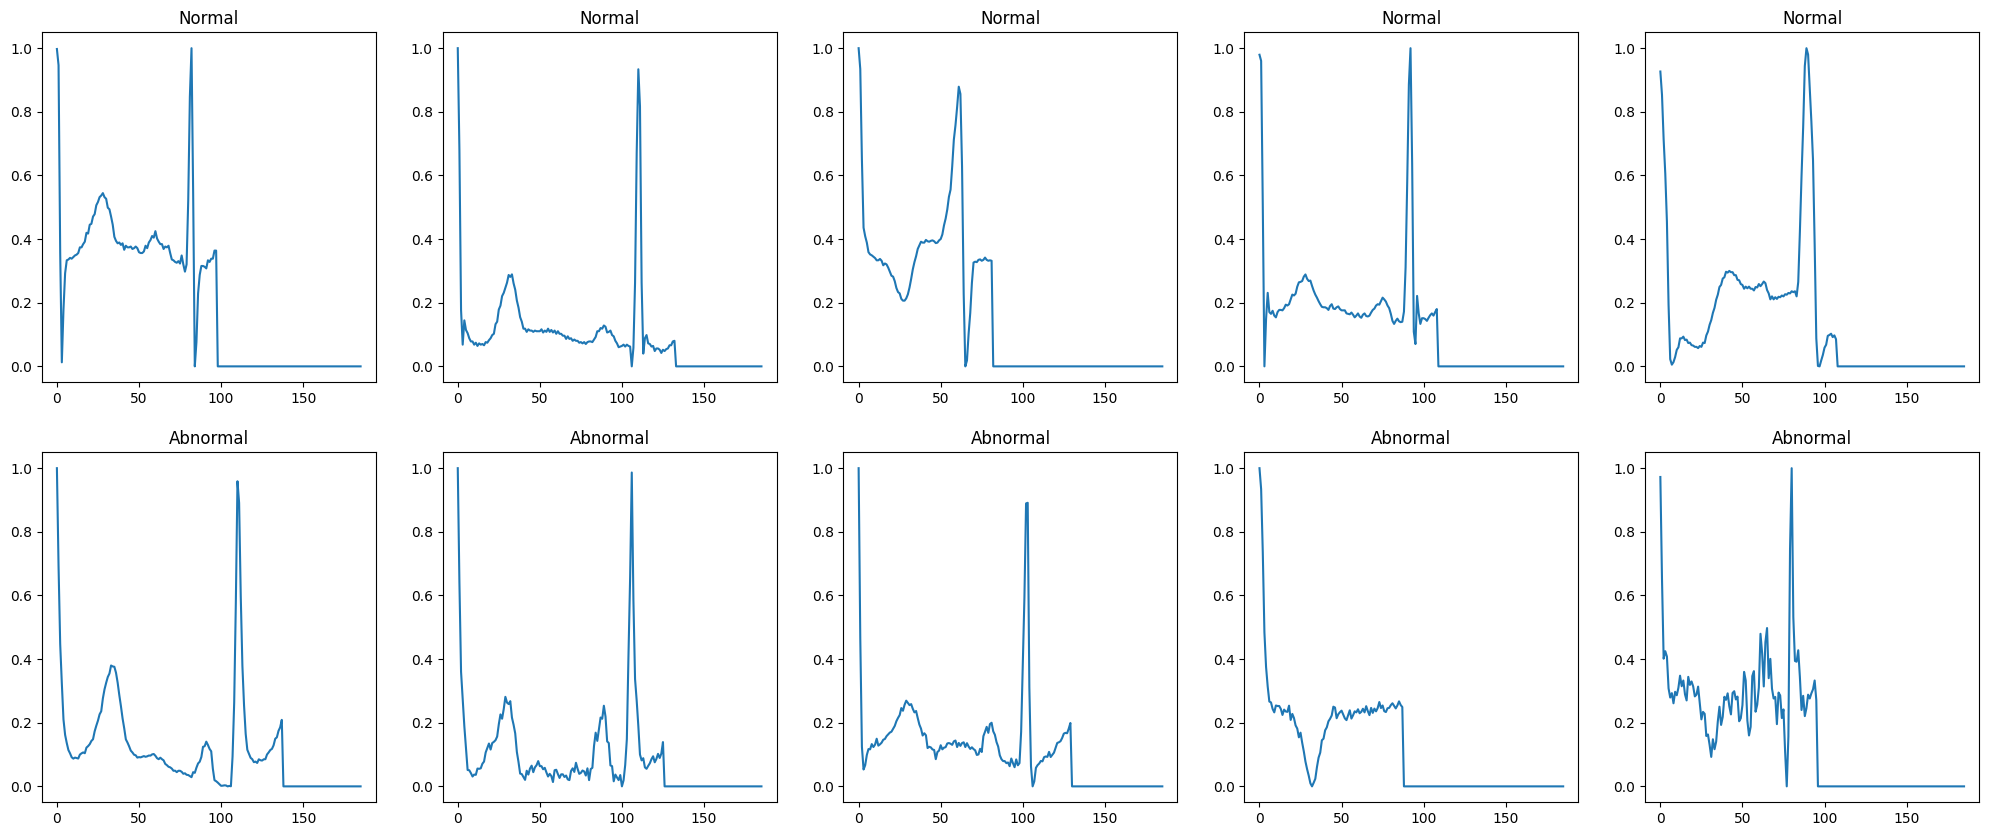

In [20]:
rnd_normal = np.random.randint(0, normaldata.shape[0], size=(5,))
rnd_abnormal = np.random.randint(0, abnormaldata.shape[0], size=(5,))

plt.figure(figsize=(25, 10))
np_count = np.linspace(0, 186, 187)
np_time = np.tile(np_count, (10, 1))

for i in range(np_time.shape[0]):
    ax = plt.subplot(2, 5, i + 1)
    if (i < 5):
        ax.plot(traindata.iloc[rnd_normal[i], :186])
        ax.set_title("Normal")
    else:
        ax.plot(abnormaldata.iloc[rnd_abnormal[i - 5], :186])
        ax.set_title("Abnormal")

plt.show()
